In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.io
import cmocean 
import sys
sys.path.insert(1, '/Users/emmagurcan/Documents/France/ENS/M1/stageM1/analysis')
import fonctions as f
from functions_MSM74 import *
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
from geopy.distance import geodesic

In [2]:
rep = '/Users/emmagurcan/Documents/France/ENS/M1/stageM1'
uCTD = scipy.io.loadmat(rep+'/Data/Data_MSM40/UCTD_dataproc.mat')
adcp = scipy.io.loadmat(rep +'/Data/Data_MSM40/adcp_150kHz/TL_GEOMAR_150_STJOHNS_BREST_000_000000_6_hc.mat')

In [3]:
# Define the section (section 2 can't be plotted => no uCTD measures)
section_num = 5
sub_section = 2
start_index, end_index, len_section, start_index_adcp, end_index_adcp = f.section(section_num)
name = f'section_{section_num}'
inv_x = 0
if section_num == 4:
    inv_x = 1
cruise = "MSM40"
set_maxdepth(cruise)
extent=[-70, -25, 50, 70]
if sub_section < 3:
    extent=[-70, -15, 50, 70]

In [4]:
# Define depth limit for uCTD
depth_max=300

# Define depth limit for ADCP
depth_max_adcp=300

# Create depth array
depth = np.arange(0, 1001)

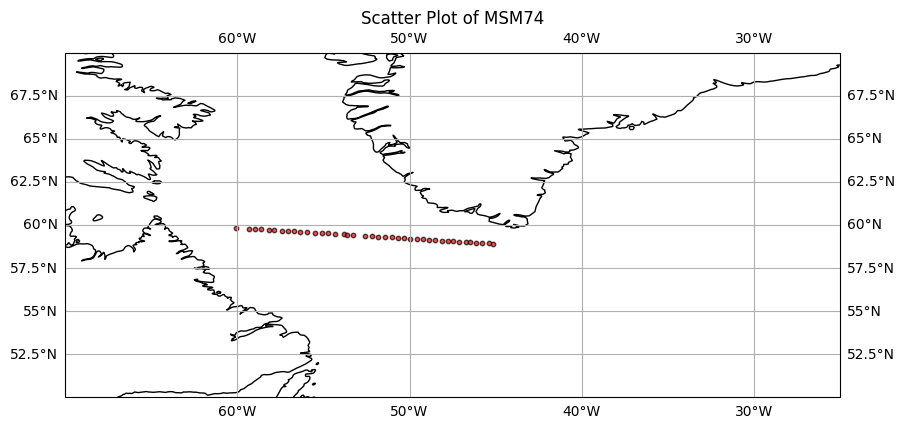

In [5]:
# CTD data
lon = np.squeeze(uCTD['uctdlon'])[start_index:end_index+1]
lat = np.squeeze(uCTD['uctdlat'])[start_index:end_index+1]
PT = np.squeeze(uCTD['PTgrid'])[:,start_index:end_index+1]
PD = np.squeeze(uCTD['PDgrid'])[:,start_index:end_index+1]
S = np.squeeze(uCTD['Sgrid'])[:,start_index:end_index+1]

plot_coords(lon, lat)

In [6]:
# Select adcp data
b = adcp['b']
bb = b[0,0]
ref = bb[0][0,0][0]
nav = bb[2][0,0][0]
vel = bb[1]
u = vel[:,0,:] + ref[0,:] # vitesse zonale, positive vers l'est
v = vel[:,1,:] + ref[1,:] # vitesse méridionale, positive vers le nord
depth_adcp = bb[3][0]
LON_adcp = nav[1,:]
LAT_adcp = nav[2,:]
LAT = LAT_adcp[start_index_adcp:end_index_adcp+1]
LON = LON_adcp[start_index_adcp:end_index_adcp+1]
u_section = u[:,start_index_adcp:end_index_adcp+1]
v_section = v[:,start_index_adcp:end_index_adcp+1]

offset = geodesic((lat[0], lon[0]), (LAT[0], LON[0])).kilometers

In [7]:
# if section_num == 7:
#     splits = np.linspace(np.max(lon), np.min(lon), 4)
#     start = splits[sub_section - 1]
#     stop = splits[sub_section]
#     valid_ctd = np.where(np.logical_and(lon < start, lon > stop))
#     lon = lon[valid_ctd]
#     lat = lat[valid_ctd]
#     PT = PT[:, valid_ctd].squeeze()
#     PD = PD[:, valid_ctd].squeeze()
#     S = S[:, valid_ctd].squeeze()
#     valid_adcp = np.where(np.logical_and(LON < start, LON > stop))
#     LAT = LAT[valid_adcp]
#     LON = LON[valid_adcp]
#     u_section = u_section[:, valid_adcp].squeeze()
#     v_section = v_section[:, valid_adcp].squeeze()

In [8]:
# Calculate distances
d1 = np.sin(lat*(math.pi/180))*np.sin(lat[0]*(math.pi/180))
d2 = np.cos(lat*(math.pi/180))*np.cos(lat[0]*(math.pi/180)) * \
    np.cos(abs(lon[0]-lon)*(math.pi/180))
distance = 6371*np.arccos(d1+d2)

d1_adcp = np.sin(LAT*(math.pi/180))*np.sin(LAT[0]*(math.pi/180))
d2_adcp = np.cos(LAT*(math.pi/180))*np.cos(LAT[0]*(math.pi/180)) * \
    np.cos(abs(LON[0]-LON)*(math.pi/180))
distance_adcp = 6371*np.arccos(d1_adcp+d2_adcp)

# Calculate orthogonal velocity
# a1 = 6371*np.arccos(np.sin(LAT[-1]*(math.pi/180))*np.sin(LAT[0]*(math.pi/180))+np.cos(LAT[-1]*(math.pi/180))*np.cos(LAT[0]*(math.pi/180)))
# b1 = 6371*np.arccos(np.sin(LAT[-1]*(math.pi/180))*np.sin(LAT[-1]*(math.pi/180))+np.cos(LAT[-1]*(math.pi/180))*np.cos(LAT[-1]*(math.pi/180))*np.cos(abs(LON[-1]-LON[0])*(math.pi/180)))
# alpha = np.arctan(a1/b1)
# v_ortho = np.cos(alpha)*u_section + np.sin(alpha)*v_section

v_ortho = calc_ortho_vel(section_num, cruise, LON, LAT, u_section, v_section)

In [9]:
v_ortho.shape

(37, 2833)

In [10]:
print(np.unique(distance).shape)
print(np.shape(PT))

(40,)
(1001, 40)


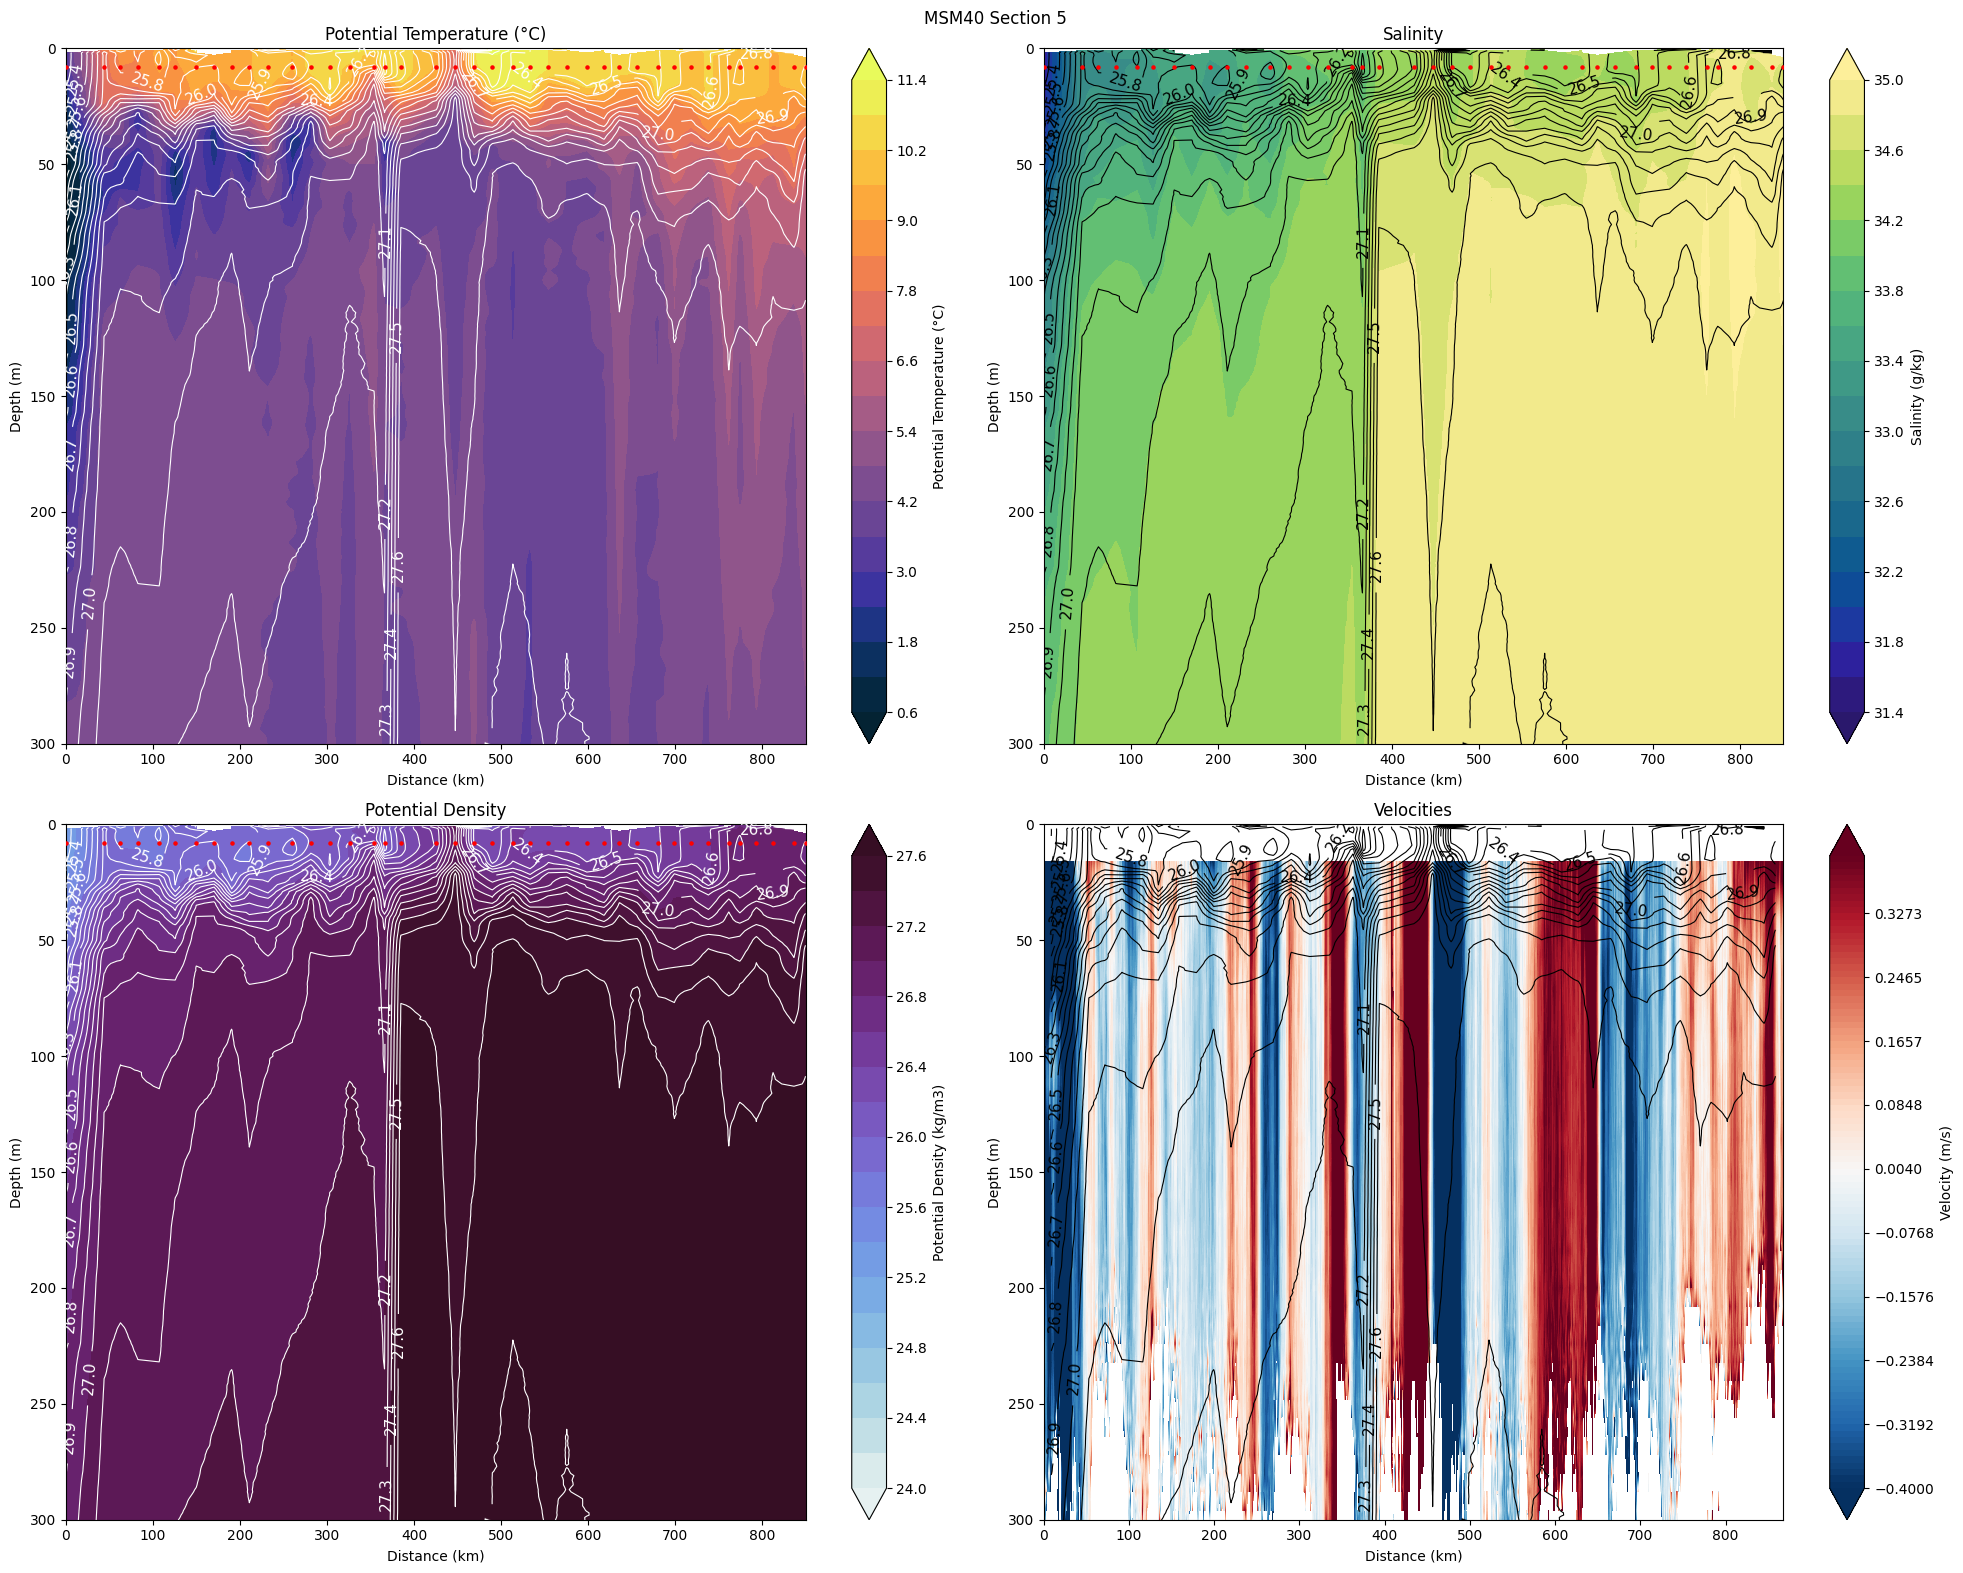

In [11]:
plot_sectionMSM40(distance, depth, distance_adcp, depth_adcp, PT, S, PD, v_ortho, section_num, offset=offset)